# Lab 7: Survival Modeling

pip install scikit-survival lifelines statsmodels 
pixi add scikit-survival lifelines statsmodels


## Overview
This lab focuses on survival modeling techniques and their applications in statistical analysis. The primary topics covered include Cox regression, regularized Cox regression, Random Survival Forest, Kaplan-Meier curve analysis, and multiple testing correction.

- Cox PH Reggression model that can handle sensored data; 
- KM curve models survivalv function over time;
- Add some ML elements into survival modeling.
- Add some regularisation, Lasso penalty to coefficients;
- Extending funcitonality for random forests to handle sensor data + where 'target' is continuous value w event tag. 

## Topics Covered

### 1. Survival Models
Survival models analyze time-to-event data, allowing us to estimate hazard rates and survival probabilities. Start by etsablishing baseline model, often cox ph.  Below are the key models explored:

| Model                      | Description |
|----------------------------|-------------|
| **Cox Regression**         | A semi-parametric model that estimates the hazard ratio while accounting for covariates. |
| **Regularized Cox Regression** | A variant of Cox regression incorporating LASSO or Ridge penalties to handle high-dimensional data. |
| **Random Survival Forest** | A non-parametric ensemble learning method that uses decision trees to model survival data. |

#### Implementation Notes
- Cox regression: Implemented using `lifelines` or `statsmodels` in Python.
- Regularized Cox regression: Uses L1/L2 penalties with `scikit-survival` or `sksurv`.
- Random Survival Forest: Implemented via `scikit-survival` or `sksurv` with hyperparameter tuning.

### 2. Kaplan-Meier Curve Analysis
The Kaplan-Meier estimator is a non-parametric method for estimating survival probabilities over time.

<img src="km-curve.png" alt="drawing" style="width:600px;"/>

| Feature                | Description |
|------------------------|-------------|
| **Survival Function**  | Estimates the probability of survival beyond a certain time point. |
| **Log-Rank Test**      | Compares survival distributions across groups. |
| **Visualization**      | Stepwise function plotted using `matplotlib` or `lifelines`. |

#### Interpretation
- A steep drop in the Kaplan-Meier curve suggests high event occurrence at that time point.
- Log-rank test helps assess statistical differences between survival curves of different groups.


### 3. Dataset Usage
While we have skeleton code in the notebook using pre-loaded datasets from `lifelines` and `sksurv` packages, we will also explore a publicly available dataset from [NSCLC Radiogenomics](https://www.cancerimagingarchive.net/collection/nsclc-radiogenomics/). This dataset provides imaging and clinical data for non-small cell lung cancer (NSCLC) patients, allowing us to apply survival analysis techniques in a real-world context.


## Summary
- **Cox models** estimate hazard ratios for covariates.
- **Kaplan-Meier curves** visualize survival probabilities over time.
- **Real-world dataset** from NSCLC Radiogenomics allows practical application of survival modeling.

Each section includes hands-on coding exercises and questions for deeper exploration.


## 1. Survival Models

### 1.1 Cox Regression

We will start by implementing Cox regression for survival analysis. We will also explore different parameters and visualize the results.

Start by establishing a baseline; Cox model is standard and would be a logical first step.

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2025-06-26 21:33:51 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
fin       -0.38      0.68      0.19           -0.75           -0.00                0.47                1.00
age       -0.06      0.94      0.02           -0.10           -0.01                0.90                0.99
race       0.31      1.37      0.31           -0.29            0.92                0.75                2.50
wexp      -0.15      0.86      0.21           -0.57            0.27                0.57                1.30
mar       -0.43      0.65      0.38           -1.18            0.31                0.31                1.37
paro      -0.08      0.92      0.20           -0.47            0.30                0.63                1.35
prio       0.09      1.10      0.03            0.04            0.15                1.04                1.16

           cmp to     z      p  -log2(p)
covariate                               
fin          0.00 -1.98   0.05      4.40
age          0.00 -2.61   0.01      6.79
race         0.00  1.02   0.31      1.70
wexp         0.00 -0.71   0.48      1.06
mar          0.00 -1.14   0.26      1.97
paro         0.00 -0.43   0.66      0.59
prio         0.00  3.19 <0.005      9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

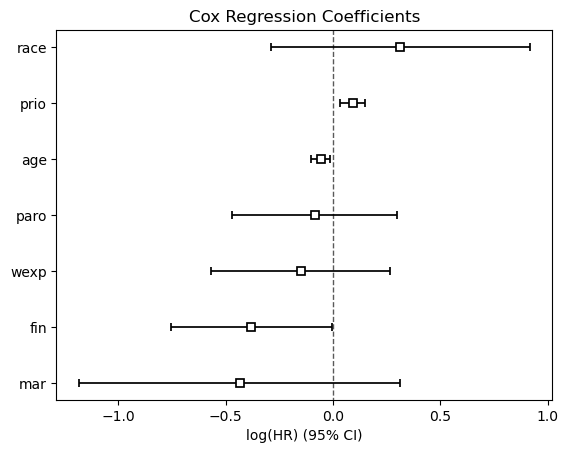

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import modeling functionality
from lifelines import CoxPHFitter # dont know the baseline hazard but we can model it, default non parametric
from lifelines.datasets import load_rossi # dataset we'll be using:
# follows convicts, give exp treatment (finnancial support) after they got out; follow up on whether 'some event' (reincarceration) happened 
# week = time to event happening
# arrest == T F

# Load the Rossi dataset
data = load_rossi()

# Fit the Cox proportional hazards model
# INSTANTIATE, FIT, PREDICT
cph = CoxPHFitter()
# fitting auto gives us coefficients for a fit model; only matters how you interact w object after
# tell the funx what col tells duration and what col is event 
cph.fit(data, duration_col='week', event_col='arrest')
# within cph object, will have all the coefficients

# Print the summary of the model
cph.print_summary() # built in summary function 
# could also print specific variable outputs 

# Plot the coefficients
cph.plot()
plt.title('Cox Regression Coefficients')
plt.show()


Concordance = 0.64 --> 64%; model correctly assess high risk people 64% of the time; with health data, this isnt too bad; far from being clinically actionable but good indication of what features we need to look at;

Partial AIC == goodness of fit measure (vs complexity of the model)
- --> if enriched the data w more features, this might change; lower is better;
as AIC increases, fit isnt as good. will vary depending on how you scale your data. Not that we use 'AIC should hit this absolute threshold to indicate a good model', but rather used as comparison score bw models.

Each row == given feature in dataset. 

coefficient of model == Beta value;

exponential (coefficient) === hazard ratio

std error of coeff, 95% CI, z-score of fit, p-value for each variable//covariate in the model; log2 of p-value;

hazard ratio <1 == of benefit to subject/patient; hazard ratio > 1 == detrimental to subject/patient;

fin = compensation for treatment --> was good for their risk

plot funciton gives us a visual plot of the same info; log(hazard ratio) Confidence Int: (+) beneficial, (-) detrimental;
if CI bar crosses dotted central line == variable *not* significant

In [ ]:
CoxPHFitter? # has some built-in regularisation parameters but prof thinks scikit reg works better
# load_rossi?

Init signature:
CoxPHFitter(
    baseline_estimation_method: 'str' = 'breslow',
    penalizer: 'Union[float, np.ndarray]' = 0.0,
    strata: 'Optional[Union[List[str], str]]' = None,
    l1_ratio: 'float' = 0.0,
    n_baseline_knots: 'Optional[int]' = None,
    knots: 'Optional[List]' = None,
    breakpoints: 'Optional[List]' = None,
    **kwargs,
) -> 'None'
Docstring:     
This class implements fitting Cox's proportional hazard model.

.. math::  h(t|x) = h_0(t) \exp((x - \overline{x})' \beta)

The baseline hazard, :math:`h_0(t)` can be modeled in two ways:

1. (default) non-parametrically, using Breslow's method. In this case, the entire model is the traditional semi-parametric Cox model. Ties are
handled using Efron's method.

2. parametrically, using a pre-specified number of cubic splines, or piecewise values.

This is specified using the ``baseline_estimation_method`` parameter in the initialization (default = ``"breslow"``)

Parameters
----------

  alpha: float, optional (defa

### Questions for Exploration

1. How do we interpret the hazard ratios derived from the Cox model, and what do they imply about risk factors?
2. What assumptions does the Cox proportional hazards model make, and how can we test if they hold? HINT: check this [link](https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html).
3. What happens to the model performance if you include or exclude certain covariates?
4. What happens to the model performance if you change the `baseline_estimation_method`?

There is sfuncitonality we can use ot test PH assumptions and, if assumptions not met, will tell you what variables do not meet and suggest ways to handle.

### 1.2 Lasso for Censored Data

Now, we will implement Lasso for censored data using the Cox regression model with L1 regularization. We will also explore different parameters and visualize the results.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sksurv.linear_model import CoxnetSurvivalAnalysis # alittle different bc need to restructure our input data 
from lifelines.datasets import load_rossi
from sklearn.model_selection import train_test_split
from sksurv.metrics import concordance_index_censored

# Load the Rossi dataset
data = load_rossi()

# Prepare the data for sksurv
# nede to pass in targets in structured way; time to event + event indicator
X = data.drop(columns=['week', 'arrest']).astype(float)
y = np.array([(bool(event), time) for event, time in zip(data['arrest'], data['week'])], dtype=[('event', bool), ('time', float)])
# looks similar but *MUST* be ndarray (~structured tuples), same input as randomsurvivalForest
# unique to scikitSurvival
# X data == features ; plays a bit better w the functionality 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Cox proportional hazards model with L1 regularization
# INSTANTIATE, FIT, PREDICT
cph_lasso = CoxnetSurvivalAnalysis(l1_ratio=1.0) #L1 reg; freedom oto choose what feature sremain in teh model
cph_lasso.fit(X_train, y_train)

# Predict the risk scores on the test set
# evaluation by concordance model
risk_scores = cph_lasso.predict(X_test)

# Calculate the concordance index
c_index = concordance_index_censored(y_test['event'], y_test['time'], risk_scores)[0]
print(f'Concordance Index: {c_index:.4f}') # concordance index

# concordance higher by ~2% 
# model performance better but not as robust as lifelines package ?
# could probably tune it to do better

Concordance Index: 0.6631


### Questions for Exploration

1. How does the L1 regularization affect the coefficients of the Cox regression model? HINT: examine `cph_lasso.coef_`.
2. How does penalizing the Cox model (e.g., L1/L2 regularization) impact variable selection and model performance?
3. What happens to the model performance if you change the `l1_ratio`?
4. What are the differences in model performance and interpretability between `CoxPHFitter` from `lifelines` and `CoxnetSurvivalAnalysis` from `sksurv`?

### 1.3 Random Survival Forest

Next, we will implement a Random Survival Forest for survival analysis. We will also explore different parameters and visualize the results.

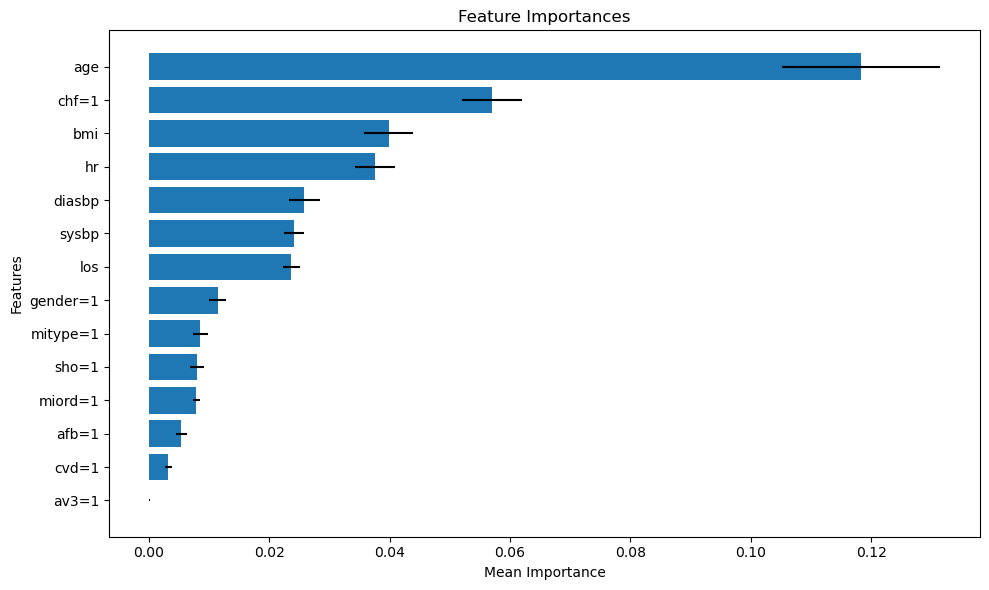

In [ ]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.datasets import load_whas500
from sksurv.preprocessing import OneHotEncoder # could uses pd.get_dummies()
from sklearn.inspection import permutation_importance
# this time using scikit for data prep, so y will already be in compatable format 

# Load the WHAS500 dataset
data_x, data_y = load_whas500()

# Encode categorical variables
encoder = OneHotEncoder()
data_x = encoder.fit_transform(data_x)

# Train a Random Survival Forest model
rsf = RandomSurvivalForest(n_estimators=100, random_state=42)
rsf.fit(data_x, data_y)

# please refer to https://scikit-survival.readthedocs.io/en/stable/user_guide/random-survival-forest.html
# permutation importance: looking at differnet permutations and assessing importance in tree-based funcitonality; what features giving menaingful splits? what features show more importance?
# functionality for random forest classifier had this built in 
result = permutation_importance(rsf, data_x, data_y, n_repeats=15, random_state=42)
feature_importance = pd.DataFrame(
         {
        k: result[k]
        for k in (
            "importances_mean",
            "importances_std",
        )
    },
    index=data_x.columns,
).sort_values(by="importances_mean", ascending=False)

# Sort by importances_mean and plot
feature_importance = feature_importance.sort_values(by="importances_mean", ascending=False)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(feature_importance.index, feature_importance['importances_mean'], xerr=feature_importance['importances_std'], align='center')
plt.xlabel('Mean Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
RandomSurvivalForest?
# oob_score -> concordance index

# load_whas500?
# permutation_importance?
print(rsf.score(X_test, y_test)) #<-- to do 

### Questions for Exploration

1. How do the feature importances from the Random Survival Forest model interpret the relationship between covariates and survival time?
2. What happens to the model performance if you change the number of trees (`n_estimators`)?
3. How does the choice of dataset affect the Random Survival Forest results and their interpretation?

## 2. Kaplan-Meier Curve Analysis

We will perform Kaplan-Meier curve analysis to visualize and interpret survival probabilities over time. We will also explore different visualization techniques.

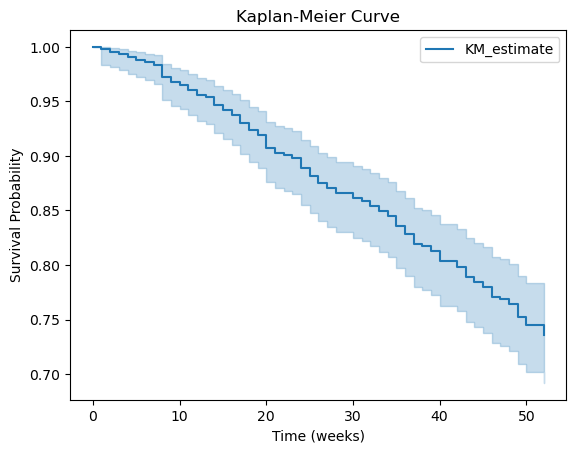

In [ ]:
from lifelines import KaplanMeierFitter
# FIT to your data and plot Survival 

# Load the Rossi dataset
data = load_rossi()

# Fit the Kaplan-Meier estimator
# INSTANTIATE, FIT, PREDICT
kmf = KaplanMeierFitter()
kmf.fit(data['week'], event_observed=data['arrest'])
# generates one curve as survival funx for every patient in the dataset
# if we want to stratify by a particular feature, just fit 2 separate objects 
# 'starify' == looking at survival as fucntion of this variable 
# can index to plot them all (other ways as well?)

# Plot the Kaplan-Meier curve
kmf.plot_survival_function() #intuitive and lots of built in funxality, .print_saummary() 
plt.title('Kaplan-Meier Curve')
plt.xlabel('Time (weeks)')
plt.ylabel('Survival Probability')
plt.show()


having use case give smore incentive for exploringthings;
also ways to ocmpare multiple groups;

when you have 2 curves, can compare statistically using 'log-rank test' but there're also multivariate log rank test.

### Questions for Exploration

1. What happens to the Kaplan-Meier curves if you stratify the data by different covariates?
2. How can you extract median survival time from a Kaplan-Meier estimator in `lifelines`?
3. How do confidence intervals impact the interpretation of Kaplan-Meier curves?
4. How can you compare multiple survival groups using statistical tests such as the log-rank test? HINT: check this [link](https://lifelines.readthedocs.io/en/latest/lifelines.statistics.html).

In [7]:
KaplanMeierFitter?

Init signature: KaplanMeierFitter(alpha: 'float' = 0.05, label: 'str' = None)
Docstring:     
Class for fitting the Kaplan-Meier estimate for the survival function.

Parameters
----------
alpha: float, optional (default=0.05)
    The alpha value associated with the confidence intervals.
label: string, optional
    Provide a new label for the estimate - useful if looking at many groups.

Examples
--------
.. code:: python

    from lifelines import KaplanMeierFitter
    from lifelines.datasets import load_waltons
    waltons = load_waltons()

    kmf = KaplanMeierFitter(label="waltons_data")
    kmf.fit(waltons['T'], waltons['E'])
    kmf.plot()


Attributes
----------
survival_function_ : DataFrame
    The estimated survival function (with custom timeline if provided)
median_survival_time_ : float
    The estimated median time to event. np.inf if doesn't exist.
confidence_interval_ : DataFrame
    The lower and upper confidence intervals for the survival function. An alias of
    ``con

## 3. Dataset Usage (preprocessing)

On Blackboard, you'll find a folder titled 'NSCLC Dataset'. In here, you'll find two spreadsheets:
- `tpm_counts.csv` which contains RNA sequencing data in transcripts per million (TPM);
- `clinical.csv` which contains the associated clinical data for the study.



In [ ]:
rna = pd.read_csv('NSCLC Dataset/tpm_counts.csv')

# describe the data
rna.head()
# rna.describe()   # <-- will show the summary statistics of the data, but not recommended as it will take a while

# if missing some, can impute
# if missing lots, remove cols
# here we gave 22k features (cols), so could to regularisation for feature selection instead
# some rows that dont map; data from multiple institutions 

# this dataset is just features, no 'time to event'; just see how gene expression affects patient survival
# anon subj ID, some cols that dont map
# can use some common sense to reduce cols, such as cols that dont have variation in answers wont provide new insight 

# Cancer Staging:
# T size + location of 1ary tumour
# N regional/nodal inflitration
# M metastatic tumour
# together, comprise up to 4 stagings, higher stage == worse;

# survival status, last known alive has exact DATES 
# --> model not expecting dates --> need to logic it out to understand what that number is 
# we have: CT scan date, days bw CT + surgery, last known alive date
#   --> wanna measure surgery till last known alive, so do the math
#               last alive - CT + days to surgey = days from surgery to last known alive
#               = approx survival period in days (rather than having a date) 
# alive = right censored data



Unnamed: 0  1/2-SBSRNA4      A1BG  ...     ZZEF1      ZZZ3      tAKR
0    R01-023          NaN       NaN  ...  0.015358  0.097214       NaN
1    R01-024          NaN  0.001312  ...  0.002628  0.026063  0.001161
2    R01-006          NaN  0.016708  ...  0.053792  0.751144       NaN
3    R01-153          NaN  0.015543  ...  0.059970  0.381846       NaN
4    R01-031          NaN  0.000868  ...  0.005520  0.039283       NaN

[5 rows x 22127 columns]

In [10]:
clinical = pd.read_csv('NSCLC Dataset/clinical.csv')

# describe the data
clinical.head()
# clinical.describe()

Case ID Patient affiliation  ...  Days between CT and surgery       PET Date
0  AMC-001            Stanford  ...                            9  Not Collected
1  AMC-002            Stanford  ...                            3  Not Collected
2  AMC-003            Stanford  ...                           28  Not Collected
3  AMC-004            Stanford  ...                           47  Not Collected
4  AMC-005            Stanford  ...                            2  Not Collected

[5 rows x 40 columns]

Next, try incorporating clinical data from `clinical.csv` into the analysis. To do this, follow these steps:
1. Create a `time` column by calculating the number of days between **'Date of Last Known Alive'** and **'CT Date'** (both in MM/DD/YYYY format).
2. Convert the **'Survival Status'** column into a boolean event indicator, where **Death** corresponds to `True` (event observed).

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
from sksurv.util import Surv

clinical_data = clinical.copy()

# Convert date columns to datetime format
# based on the data, CT happened first, end is last follow up date
clinical_data["Date of Last Known Alive"] = pd.to_datetime(clinical_data["Date of Last Known Alive"], format="%m/%d/%Y")
clinical_data["CT Date"] = pd.to_datetime(clinical_data["CT Date"], format="%m/%d/%Y")
# mathematical calculations on this format of dates is supported 

# Calculate time in days
clinical_data["time"] = (clinical_data["Date of Last Known Alive"] - clinical_data["CT Date"]).dt.days - clinical_data['Days between CT and surgery']

# Convert event column to boolean (Death = True, Alive = False)
clinical_data["event"] = clinical_data["Survival Status"].apply(lambda x: True if x == "Dead" else False)
# alt: ['Survival Status] == "Dead"

# Convert to sksurv structured array format
survival_data = Surv.from_dataframe("event", "time", clinical_data)

## Extensions

Explore other survival analysis techniques such as:
- Accelerated Failure Time (AFT) models
- Competing risks models
- Time-dependent covariates in Cox regression

Compare their performance and interpretation with the techniques covered in this lab.